<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Neural Networks: Regularization
</p>
</div>

Data Science Cohort Live NYC Jully 2022
<p>Phase 4: Topic 41</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

In [16]:
from sklearn.datasets import load_sample_images
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Things to remember:


## STEPS ##

1. Load Data
2. Define Keras Model
3. Compile Keras Model
4. Fit Keras Model
5. Evaluate Keras Model
6. Make Predictions


- The data and labels in `fit()` need to be numpy arrays, not `pandas` dfs.
- Scaling your data will have a large impact on your model.
   > For our traditional input features, we would use a scaler object. For images, as long as the minimum value is 0, we can simply divide through by the maximum pixel intensity.

#### Regularization
- Retain complexity of neural network: many weights to learn interesting relationships
- Make our weights less susceptible to overfitting

**Getting neural networks to perform really well**

In neural networks, two main forms of regularization:
- L2 Regularization (something familiar)
- Dropout Regularization (something a little new)

**L2 Regularization**

- Add penalty on weight **matrices**.
$$ J \rightarrow J' $$
$$ J = \sum_{i=1}^m \frac{1}{m}L(y_i, \hat{y}_i) $$
$$ J' = \sum_{i=1}^m \frac{1}{m}L(y_i, \hat{y}_i) + \frac{\lambda}{2} \sum_{l=1}^L \lVert  W^{[l]}   \rVert_F^2 $$

where $F$ denotes the Frobenius norm.

Frobenius norm is square root of sum of of element-wise square:
i.e. 
$$ \lVert  A   \rVert_F = \sqrt{\sum_{i,j} A_{ij}^2 }$$

In [17]:
import numpy as np
from numpy.linalg import norm

In [18]:
A = np.array([[1,2],[0,3]])
A

array([[1, 2],
       [0, 3]])

In [19]:
norm(A, 'fro')

3.7416573867739413

In [20]:
np.sqrt(1**2 + 0**2 + 2**2 + 3**2)

3.7416573867739413

Modiied objective functon:

$$ J' = \sum_{i=1}^m \frac{1}{m}L(y_i, \hat{y}_i) + \frac{\lambda}{2} \sum_{l=1}^L \lVert  W^{[l]}   \rVert_F^2 $$

Regularization serves to penalize any particular weight from being too large:
- smoothens/redistributes weights for each weight matrix
- aids in generalization

L2 regularization: often known as weight decay
- Perspective: gradient descent
$$ J' = \sum_{i=1}^m \frac{1}{m}L(y_i, \hat{y}_i) + \frac{\lambda}{2} \sum_{l=1}^L \lVert  W^{[l]}   \rVert_F^2 $$
$$ W^{[l]} \rightarrow W^{[l]} - \alpha \frac{\partial J'}{\partial W^{[l]}} $$ 

$$ J = \sum_{i=1}^m \frac{1}{m}L(y_i, \hat{y}_i) $$
$$ W^{[l]} \rightarrow \Big(W^{[l]}  - \alpha \frac{\lambda}{2 m}  W^{[l]} \Big) - \alpha \frac{\partial J}{\partial W^{[l]}}$$ 

- At each iteration regularization tries to reduce magnitude of weight matrix.

#### Implementing L2 regularization in Keras

In [21]:
# creates keras regularizer object
from tensorflow.keras.regularizers import l2

L2 regularizer object takes in $\lambda$ parameter as argument

In [22]:
reg = l2(3e-3) # 1e-5 to .1

Implementing regularization to weights in Keras:
- Dense(kernel_regularizer = __)
- takes in string ('l2') or regularizer object

Less common but also used:

- can apply regularization to bias terms 
- Dense(bias_regularizer = __)

In [23]:
# load in the data
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = x_train/255 # normalization
x_test = x_test/255

# Keras requires multi-class labels to be one-hot encoded
y_tr_one_hot = to_categorical(y_train)
y_tt_one_hot = to_categorical(y_test)

In [24]:
model_images = Sequential()
model_images.add(Flatten(input_shape=(28, 28))) # flattens each 28x28 image into a vector
model_images.add(Dense(32, activation='relu', kernel_regularizer = reg)) # take in regularizer
model_images.add(Dense(8, activation='relu', kernel_regularizer = reg))
model_images.add(Dense(10, activation='softmax')) # number of units = number of target classes

2022-07-28 09:14:02.572912: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-28 09:14:02.573948: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [25]:
model_images.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'] )

In [26]:
# verbose=1 allows you to see the output.
# To see only the metrics at the end of each epoch, set verbose=2.
history_mnist = model_images.fit(x_train, y_tr_one_hot, epochs=50, batch_size= 32, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 6s 126us/sample - loss: 0.7259 - accuracy: 0.8358 - val_loss: 0.4578 - val_accuracy: 0.9183
Epoch 2/50
48000/48000 [==============================] - 5s 109us/sample - loss: 0.4453 - accuracy: 0.9218 - val_loss: 0.4008 - val_accuracy: 0.9339
Epoch 3/50
48000/48000 [==============================] - 6s 117us/sample - loss: 0.3993 - accuracy: 0.9327 - val_loss: 0.3731 - val_accuracy: 0.9424
Epoch 4/50
48000/48000 [==============================] - 6s 120us/sample - loss: 0.3704 - accuracy: 0.9395 - val_loss: 0.3572 - val_accuracy: 0.9423
Epoch 5/50
48000/48000 [==============================] - 6s 124us/sample - loss: 0.3505 - accuracy: 0.9436 - val_loss: 0.3339 - val_accuracy: 0.9502
Epoch 6/50
48000/48000 [==============================] - 6s 124us/sample - loss: 0.3352 - accuracy: 0.9457 - val_loss: 0.3228 - val_accuracy: 0.9507
Epoch 7/50
48000/48000 [==========================

In [27]:
# probability for each class
y_proba = model_images.predict(x_test)
y_proba

array([[1.4500866e-07, 2.0690342e-07, 2.3224133e-04, ..., 9.9931312e-01,
        3.4238988e-07, 9.3214243e-05],
       [3.5887337e-05, 2.0920718e-03, 9.8931259e-01, ..., 1.9705894e-06,
        1.8258429e-03, 1.3445775e-10],
       [4.6728925e-05, 9.9145210e-01, 1.3526254e-03, ..., 4.3298914e-03,
        1.3715114e-03, 3.5796114e-05],
       ...,
       [1.7799248e-09, 7.2272371e-07, 1.9486350e-08, ..., 4.2832828e-05,
        3.6416059e-05, 8.2038222e-03],
       [4.4117623e-05, 6.9544177e-07, 1.2099167e-07, ..., 7.1023109e-08,
        6.4764828e-03, 3.4581203e-04],
       [3.5148533e-04, 3.7757300e-08, 1.4378286e-04, ..., 1.7140392e-08,
        3.4550364e-06, 3.8347650e-08]], dtype=float32)

In [28]:
model_images.evaluate(x_test, y_tt_one_hot)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.20284137535095215, 0.9662]

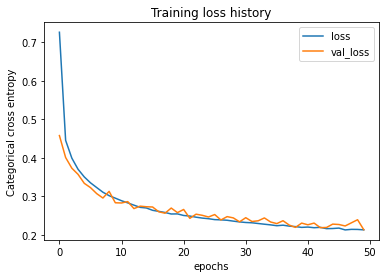

In [29]:
train_mnist_history = pd.DataFrame(history_mnist.history)
train_mnist_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_mnist_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

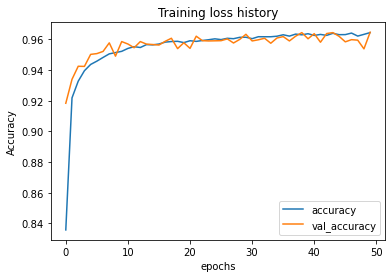

In [30]:
col_list = ['accuracy', 'val_accuracy']
train_mnist_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

Better validation accuracy:
- 94.5\% to 96.3\% with regularization
- no overfitting

In [31]:
# argmax axis = -1 gets the column index of maximum probability for each row.
# column index corresponds to digit classes (numbers 0 -9)
predicted = np.argmax(y_proba, axis=-1)
predicted

array([7, 2, 1, ..., 4, 5, 6])

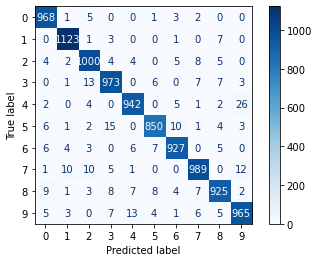

In [32]:
cm_digits = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_digits)

disp.plot(cmap=plt.cm.Blues)
plt.show()

Regularization: 
- key component to training deeper networks (tend to overfit without regularization)
- learn higher order features, but don't overtrain on specifics.

In [33]:
deepermodel_images = Sequential()
deepermodel_images.add(Flatten(input_shape=(28, 28))) # flattens each 28x28 image into a vector
deepermodel_images.add(Dense(32, activation='relu', kernel_regularizer = reg)) # take in regularizer
deepermodel_images.add(Dense(16, activation='relu', kernel_regularizer = reg)) # add another layer
deepermodel_images.add(Dense(16, activation='relu', kernel_regularizer = reg)) # add another layer
deepermodel_images.add(Dense(10, activation='relu', kernel_regularizer = reg))
deepermodel_images.add(Dense(10, activation='softmax')) # number of units = number of target classes

deepermodel_images.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'] )

In [34]:
# will take a while
history_deepermnist = deepermodel_images.fit(x_train, y_tr_one_hot, epochs=200, batch_size= 32, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 8s 157us/sample - loss: 0.7966 - accuracy: 0.8229 - val_loss: 0.4835 - val_accuracy: 0.9298
Epoch 2/200
48000/48000 [==============================] - 7s 150us/sample - loss: 0.4692 - accuracy: 0.9320 - val_loss: 0.4624 - val_accuracy: 0.9326
Epoch 3/200
48000/48000 [==============================] - 7s 148us/sample - loss: 0.4226 - accuracy: 0.9420 - val_loss: 0.4041 - val_accuracy: 0.9449
Epoch 4/200
48000/48000 [==============================] - 7s 149us/sample - loss: 0.3979 - accuracy: 0.9453 - val_loss: 0.3841 - val_accuracy: 0.9494
Epoch 5/200
48000/48000 [==============================] - 7s 156us/sample - loss: 0.3769 - accuracy: 0.9492 - val_loss: 0.3587 - val_accuracy: 0.9567
Epoch 6/200
48000/48000 [==============================] - 8s 159us/sample - loss: 0.3608 - accuracy: 0.9530 - val_loss: 0.3594 - val_accuracy: 0.9530
Epoch 7/200
48000/48000 [===================

48000/48000 [==============================] - 8s 163us/sample - loss: 0.2453 - accuracy: 0.9651 - val_loss: 0.2545 - val_accuracy: 0.9607
Epoch 55/200
48000/48000 [==============================] - 9s 178us/sample - loss: 0.2480 - accuracy: 0.9638 - val_loss: 0.2531 - val_accuracy: 0.9643
Epoch 56/200
48000/48000 [==============================] - 9s 178us/sample - loss: 0.2475 - accuracy: 0.9636 - val_loss: 0.2575 - val_accuracy: 0.9594
Epoch 57/200
48000/48000 [==============================] - 8s 174us/sample - loss: 0.2443 - accuracy: 0.9645 - val_loss: 0.2578 - val_accuracy: 0.9628
Epoch 58/200
48000/48000 [==============================] - 8s 167us/sample - loss: 0.2468 - accuracy: 0.9636 - val_loss: 0.2990 - val_accuracy: 0.9476
Epoch 59/200
48000/48000 [==============================] - 8s 173us/sample - loss: 0.2440 - accuracy: 0.9649 - val_loss: 0.2556 - val_accuracy: 0.9607
Epoch 60/200
48000/48000 [==============================] - 8s 157us/sample - loss: 0.2428 - accuracy

Epoch 108/200
48000/48000 [==============================] - 11s 227us/sample - loss: 0.2298 - accuracy: 0.9648 - val_loss: 0.2601 - val_accuracy: 0.9564
Epoch 109/200
48000/48000 [==============================] - 15s 307us/sample - loss: 0.2319 - accuracy: 0.9640 - val_loss: 0.2811 - val_accuracy: 0.9498
Epoch 110/200
48000/48000 [==============================] - 10s 207us/sample - loss: 0.2284 - accuracy: 0.9662 - val_loss: 0.2507 - val_accuracy: 0.9604
Epoch 111/200
48000/48000 [==============================] - 8s 159us/sample - loss: 0.2315 - accuracy: 0.9652 - val_loss: 0.2433 - val_accuracy: 0.9618
Epoch 112/200
48000/48000 [==============================] - 13s 265us/sample - loss: 0.2271 - accuracy: 0.9669 - val_loss: 0.2395 - val_accuracy: 0.9625
Epoch 113/200
48000/48000 [==============================] - 10s 212us/sample - loss: 0.2277 - accuracy: 0.9661 - val_loss: 0.2390 - val_accuracy: 0.9620
Epoch 114/200
48000/48000 [==============================] - 7s 151us/sample 

48000/48000 [==============================] - 8s 156us/sample - loss: 0.2181 - accuracy: 0.9671 - val_loss: 0.2307 - val_accuracy: 0.9650
Epoch 162/200
48000/48000 [==============================] - 7s 153us/sample - loss: 0.2207 - accuracy: 0.9663 - val_loss: 0.2425 - val_accuracy: 0.9594
Epoch 163/200
48000/48000 [==============================] - 7s 150us/sample - loss: 0.2192 - accuracy: 0.9672 - val_loss: 0.2422 - val_accuracy: 0.9592
Epoch 164/200
48000/48000 [==============================] - 9s 181us/sample - loss: 0.2179 - accuracy: 0.9667 - val_loss: 0.2347 - val_accuracy: 0.9620
Epoch 165/200
48000/48000 [==============================] - 8s 166us/sample - loss: 0.2184 - accuracy: 0.9666 - val_loss: 0.2390 - val_accuracy: 0.9613
Epoch 166/200
48000/48000 [==============================] - 9s 190us/sample - loss: 0.2201 - accuracy: 0.9666 - val_loss: 0.2381 - val_accuracy: 0.9620
Epoch 167/200
48000/48000 [==============================] - 8s 164us/sample - loss: 0.2189 - ac

In [35]:
#evaluate test accuracy
deepermodel_images.evaluate(x_test, y_tt_one_hot)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.2370602029800415, 0.9607]

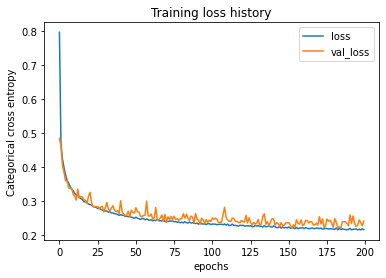

In [36]:
train_deepmnist_history = pd.DataFrame(history_deepermnist.history)
train_deepmnist_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_deepmnist_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

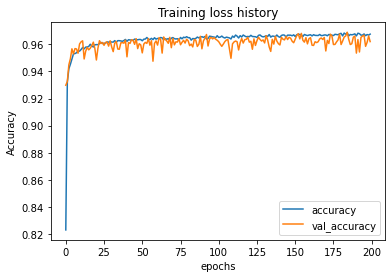

In [37]:
col_list = ['accuracy', 'val_accuracy']
train_deepmnist_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

Not overfitting even while adding much more complexity:
- in this case, not gaining much either

To do better:
- try a different regularization technique
- may need to think harder about network architecture

#### Dropout Regularization
- Architecture based strategy.

On each forward/backprop iteration:
- given layer with dropout
- shut off activations to randomly selected nodes in layer

![drop_out](images/drop_out.png)

<img src = "Images/dropout_network.gif" >

- Set $p^{[l]}$  uniform probability of node dropout for given layer
- each train cycle: kills different activations

Dead nodes dont contribute to weight updates in backprop.

after many train cycles: have learned weights:
- contributions from many different networks learning different things

<img src = "Images/Deeper_network.jpg">

Validation/test phase:
- use all nodes and learned weights.
- make prediction.

**Why it works as regularization**
- network learns not to trust in any one subset of weights: unlikely any particular weight subset gets too big.
- distributes weights in way that is robust to network noise (random dropout): generalizes well. 

#### Dropout in Keras

- Simply add it as though it were a layer. It will apply to the immediately preceding layer.

In [38]:
from tensorflow.keras.layers import Dropout

Dropout() takes in the dropout probability as a constructor argument:
- Dropout($p$) after some of the hidden layers.
- $p \in [0.2, 0.5]$ as good range to try.

In [39]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

**Define model**

In [42]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2)) # dropout on previous activations
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.1)) # dropout
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation ='softmax'))

# compile model
model.compile(optimizer=opt, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Some tips:
- Dropout earlier in network or inputs. Don't put on final layers.
- Try faster learning rates in optimizer

In [43]:
# will take a while
history_dropoutmnist = model.fit(x_train, y_tr_one_hot, epochs=200, batch_size= 32, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 8s 163us/sample - loss: 0.8490 - accuracy: 0.7217 - val_loss: 0.4003 - val_accuracy: 0.8946
Epoch 2/200
48000/48000 [==============================] - 7s 153us/sample - loss: 0.5539 - accuracy: 0.8379 - val_loss: 0.3565 - val_accuracy: 0.9045
Epoch 3/200
48000/48000 [==============================] - 8s 162us/sample - loss: 0.5030 - accuracy: 0.8562 - val_loss: 0.2974 - val_accuracy: 0.9239
Epoch 4/200
48000/48000 [==============================] - 7s 147us/sample - loss: 0.4722 - accuracy: 0.8655 - val_loss: 0.2873 - val_accuracy: 0.9249
Epoch 5/200
48000/48000 [==============================] - 7s 145us/sample - loss: 0.4492 - accuracy: 0.8712 - val_loss: 0.2900 - val_accuracy: 0.9202
Epoch 6/200
48000/48000 [==============================] - 7s 148us/sample - loss: 0.4322 - accuracy: 0.8788 - val_loss: 0.2736 - val_accuracy: 0.9289
Epoch 7/200
48000/48000 [===================

48000/48000 [==============================] - 7s 138us/sample - loss: 0.3161 - accuracy: 0.9096 - val_loss: 0.2375 - val_accuracy: 0.9384
Epoch 55/200
48000/48000 [==============================] - 7s 137us/sample - loss: 0.3138 - accuracy: 0.9082 - val_loss: 0.2334 - val_accuracy: 0.9393
Epoch 56/200
48000/48000 [==============================] - 7s 139us/sample - loss: 0.3129 - accuracy: 0.9099 - val_loss: 0.2362 - val_accuracy: 0.9383
Epoch 57/200
48000/48000 [==============================] - 6s 135us/sample - loss: 0.3157 - accuracy: 0.9091 - val_loss: 0.2312 - val_accuracy: 0.9413
Epoch 58/200
48000/48000 [==============================] - 7s 137us/sample - loss: 0.3130 - accuracy: 0.9106 - val_loss: 0.2295 - val_accuracy: 0.9414
Epoch 59/200
48000/48000 [==============================] - 7s 137us/sample - loss: 0.3161 - accuracy: 0.9099 - val_loss: 0.2336 - val_accuracy: 0.9382
Epoch 60/200
48000/48000 [==============================] - 7s 135us/sample - loss: 0.3131 - accuracy

Epoch 108/200
48000/48000 [==============================] - 7s 136us/sample - loss: 0.2946 - accuracy: 0.9132 - val_loss: 0.2373 - val_accuracy: 0.9412
Epoch 109/200
48000/48000 [==============================] - 7s 136us/sample - loss: 0.3007 - accuracy: 0.9139 - val_loss: 0.2320 - val_accuracy: 0.9391
Epoch 110/200
48000/48000 [==============================] - 7s 136us/sample - loss: 0.2984 - accuracy: 0.9147 - val_loss: 0.2221 - val_accuracy: 0.9423
Epoch 111/200
48000/48000 [==============================] - 7s 137us/sample - loss: 0.2954 - accuracy: 0.9146 - val_loss: 0.2335 - val_accuracy: 0.9383
Epoch 112/200
48000/48000 [==============================] - 7s 152us/sample - loss: 0.2941 - accuracy: 0.9151 - val_loss: 0.2352 - val_accuracy: 0.9388
Epoch 113/200
48000/48000 [==============================] - 8s 166us/sample - loss: 0.2942 - accuracy: 0.9150 - val_loss: 0.2284 - val_accuracy: 0.9422
Epoch 114/200
48000/48000 [==============================] - 8s 162us/sample - los

48000/48000 [==============================] - 8s 168us/sample - loss: 0.2868 - accuracy: 0.9171 - val_loss: 0.2299 - val_accuracy: 0.9404
Epoch 162/200
48000/48000 [==============================] - 8s 173us/sample - loss: 0.2939 - accuracy: 0.9143 - val_loss: 0.2320 - val_accuracy: 0.9419
Epoch 163/200
48000/48000 [==============================] - 8s 158us/sample - loss: 0.2889 - accuracy: 0.9161 - val_loss: 0.2376 - val_accuracy: 0.9392
Epoch 164/200
48000/48000 [==============================] - 8s 160us/sample - loss: 0.2833 - accuracy: 0.9164 - val_loss: 0.2354 - val_accuracy: 0.9430
Epoch 165/200
48000/48000 [==============================] - 7s 143us/sample - loss: 0.2842 - accuracy: 0.9166 - val_loss: 0.2469 - val_accuracy: 0.9425
Epoch 166/200
48000/48000 [==============================] - 7s 139us/sample - loss: 0.2900 - accuracy: 0.9145 - val_loss: 0.2328 - val_accuracy: 0.9402
Epoch 167/200
48000/48000 [==============================] - 7s 152us/sample - loss: 0.2903 - ac

Accuracy on train set will be lower in any given cycle:
- some activation killed randomly on training.

Performance on validation will be high:
- uses full network with learned weights for validation

Not overtraining despite high model capacity:
- many hidden layers

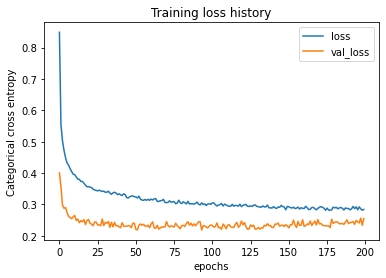

In [44]:
train_dropoutmnist_history = pd.DataFrame(history_dropoutmnist.history)
train_dropoutmnist_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_dropoutmnist_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

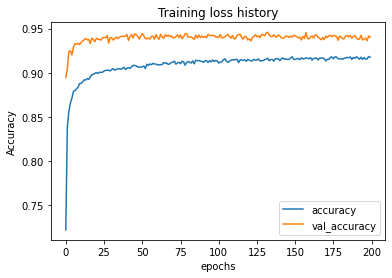

In [45]:
col_list = ['accuracy', 'val_accuracy']
train_dropoutmnist_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

Evaluate on test set.

In [47]:
model.evaluate(x_test, y_tt_one_hot, verbose =0)

[0.2676965738534927, 0.9342]

#### Dropout regularization in conjunction with L2:

- can be used to train very deep networks
- model complex relationships without overfitting
- works best in these cases with a lot of data

Next up:
- doing much better with a more suitable network architecture
- Convolutional Neural Networks (CNNs)